In [1]:
#import dependencies

import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 


In [2]:
#load train and test data from dataset
train_data=pd.read_csv('./genre classification dataset/train_data.txt',
                       sep=':::',names=['movie','genre','plot'])
test_data=pd.read_csv('./genre classification dataset/test_data.txt',
                       sep=':::',names=['movie','plot'])
test_data.head()

C:\Users\hamdi\AppData\Local\Temp\ipykernel_15200\3160011916.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data=pd.read_csv('./genre classification dataset/train_data.txt',
C:\Users\hamdi\AppData\Local\Temp\ipykernel_15200\3160011916.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data=pd.read_csv('./genre classification dataset/test_data.txt',


,movie,plot
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [3]:
#explore data
train_data.describe()
display(train_data['genre'])


1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: genre, Length: 54214, dtype: object

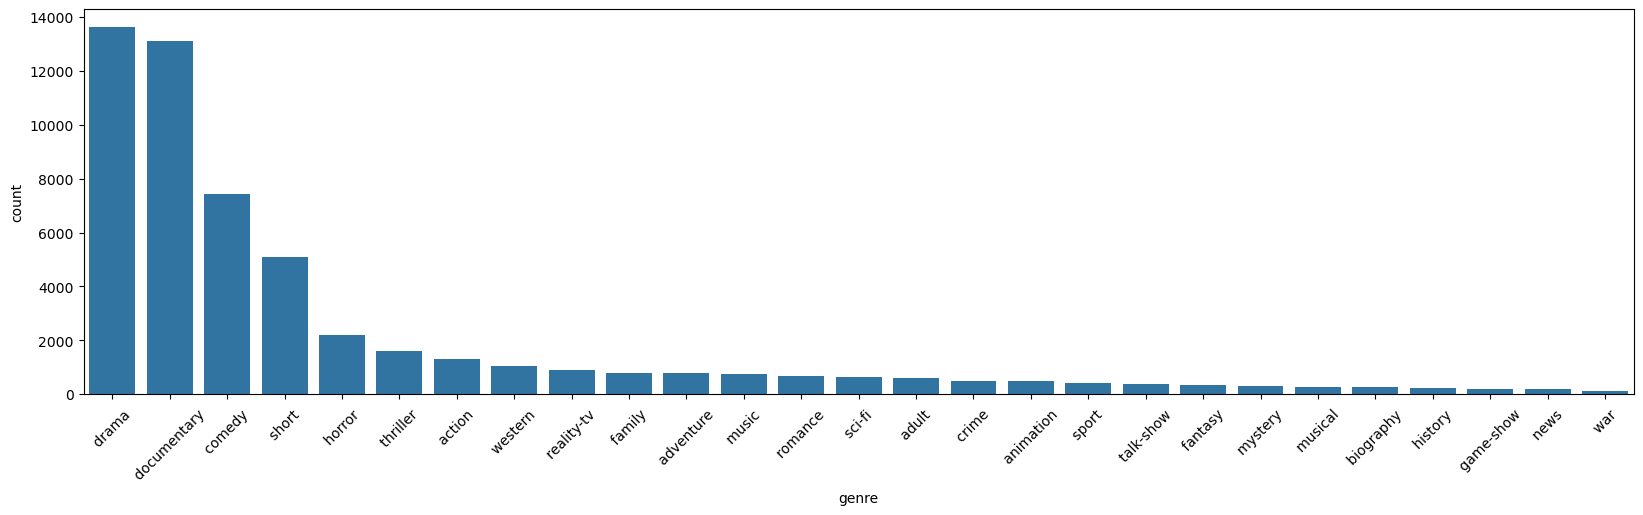

In [4]:
fig, ax = plt.subplots()
sns.countplot(data=train_data, x='genre', order=train_data['genre'].value_counts().index, ax=ax)
plt.xticks(rotation=45)
fig.set_size_inches(20, 5)

plt.show()

In [5]:
#clean the data

def cleanText(text):
    text=text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r"\s+", " ", text).strip()
    return text
    
train_data['plot_clean']=train_data['plot'].apply(cleanText)
test_data['plot_clean']=test_data['plot'].apply(cleanText)
train_data.head()
test_data.head()


,movie,plot,plot_clean
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves his life his car his apartment ...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico is a very naughty child of t...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year in the life of albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",his father has died he hasnt spoken with his b...
5,Er nu zhai (1955),Before he was known internationally as a mart...,before he was known internationally as a marti...


In [6]:
#encode genre labels
le=LabelEncoder()
train_data['encoded_genre']=le.fit_transform(train_data['genre'])
y_train=train_data['encoded_genre']
y_train.head()

1     8
2    24
3     1
4     8
5     8
Name: encoded_genre, dtype: int32

In [7]:
#vectorization with TF-IDF
vectorizer=TfidfVectorizer(stop_words='english',max_features=5000)
X_train=vectorizer.fit_transform(train_data['plot_clean'])
X_test=vectorizer.fit_transform(test_data['plot_clean'])

In [8]:
#train model
model= LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [9]:
#splitting data
X_Train_split,X_test_split,y_train_split,y_test_split=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [10]:
#train the model
model.fit(X_Train_split,y_train_split)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
#prediction
prediction=model.predict(X_test_split)
print(prediction)
prediction=le.inverse_transform(prediction)
print(prediction)
y_test_split=le.inverse_transform(y_test_split)
print(y_test_split)


[12  5  7 ...  1 12  7]
[' history ' ' comedy ' ' documentary ' ... ' adult ' ' history '
 ' documentary ']
[' documentary ' ' drama ' ' documentary ' ... ' short ' ' history '
 ' documentary ']


In [ ]:
#model accuracy
score=accuracy_score(y_test_split,prediction)
print('score=',score)

score= 0.4446186479756525


In [13]:
#save the model
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']